In [73]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import math
import warnings
import plotly.graph_objects as go
import plotly.express as px
from scipy.optimize import minimize_scalar

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#installing and importing the libraries
!pip install category_encoders

import category_encoders as ce

In [4]:
#Load Data

df = pd.read_csv("Cinema_Ticket.csv")

In [6]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5.0,2.0,5.0
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5.0,2.0,5.0
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5.0,2.0,5.0
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5.0,2.0,5.0
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5.0,2.0,5.0


In [7]:
df.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
93207,1554,183,111200000,1390,0,7,42.51,80000.000000,1390,3269.818866,2018-07-26,7.0,3.0,26.0
93208,1554,210,105440000,1318,0,12,38.03,80000.000000,1318,3465.684986,2018-07-26,7.0,3.0,26.0
93209,1554,39,93950000,973,0,10,22.25,96557.040082,973,4373.033708,2018-07-26,7.0,3.0,26.0
93210,1554,51,91100000,946,0,16,19.06,96300.211416,946,4963.273872,2018-07-26,7.0,3.0,26.0
93211,1554,474,89020000,835,0,8,62.83,106610.778443,835,1328.982970,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93212 entries, 0 to 93211
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   film_code     93212 non-null  int64  
 1   cinema_code   93212 non-null  int64  
 2   total_sales   93212 non-null  int64  
 3   tickets_sold  93212 non-null  int64  
 4   tickets_out   93212 non-null  int64  
 5   show_time     93212 non-null  int64  
 6   occu_perc     93145 non-null  float64
 7   ticket_price  93212 non-null  float64
 8   ticket_use    93212 non-null  int64  
 9   capacity      93145 non-null  float64
 10  date          93211 non-null  object 
 11  month         93211 non-null  float64
 12  quarter       93211 non-null  float64
 13  day           93211 non-null  float64
dtypes: float64(6), int64(7), object(1)
memory usage: 10.0+ MB


In [11]:
df.shape

(93212, 15)

In [9]:
df.date=pd.to_datetime(df.date)
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93212 entries, 0 to 93211
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   film_code     93212 non-null  int64         
 1   cinema_code   93212 non-null  int64         
 2   total_sales   93212 non-null  int64         
 3   tickets_sold  93212 non-null  int64         
 4   tickets_out   93212 non-null  int64         
 5   show_time     93212 non-null  int64         
 6   occu_perc     93145 non-null  float64       
 7   ticket_price  93212 non-null  float64       
 8   ticket_use    93212 non-null  int64         
 9   capacity      93145 non-null  float64       
 10  date          93211 non-null  datetime64[ns]
 11  month         93211 non-null  float64       
 12  quarter       93211 non-null  float64       
 13  day           93211 non-null  float64       
 14  year          93211 non-null  float64       
dtypes: datetime64[ns](1), float64(7), in

In [12]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day,year
count,93212.000000,93212.000000,9.321200e+04,93212.000000,93212.000000,93212.000000,93145.000000,93212.000000,93212.000000,93145.000000,93211.000000,93211.000000,93211.000000,93211.0
mean,1523.781584,323.831170,1.283381e+07,140.733768,0.221313,3.991235,19.034116,83413.530824,140.512455,868.731299,7.003036,2.708457,16.017208,2018.0
std,35.064473,161.227898,3.386465e+07,303.431696,2.729539,3.170673,22.056948,33606.759710,303.217169,993.995970,2.092174,0.788096,8.967222,0.0
min,1471.000000,32.000000,2.400000e+04,1.000000,0.000000,1.000000,0.000000,2285.714286,-219.000000,-2.000000,2.000000,1.000000,1.000000,2018.0
25%,1494.000000,181.000000,1.200000e+06,17.000000,0.000000,2.000000,3.530000,60000.000000,17.000000,270.009643,5.000000,2.000000,8.000000,2018.0
50%,1511.000000,338.000000,3.520000e+06,46.000000,0.000000,3.000000,9.610000,80000.000000,46.000000,520.000000,7.000000,3.000000,16.000000,2018.0
75%,1554.000000,474.000000,1.088000e+07,135.000000,0.000000,5.000000,26.480000,100000.000000,134.000000,1043.478261,9.000000,3.000000,24.000000,2018.0
max,1589.000000,637.000000,1.262820e+09,8499.000000,265.000000,60.000000,136.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000,2018.0


In [13]:
df[df.isnull().any(axis=1)]

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year
8691,1498,181,900000,13,0,3,NaN,69230.769231,13,NaN,2018-08-25,8.0,3.0,25.0,2018.0
9773,1498,514,2720000,34,0,4,NaN,80000.000000,34,NaN,2018-08-08,8.0,3.0,8.0,2018.0
9898,1498,477,550000,22,0,1,NaN,25000.000000,22,NaN,2018-08-07,8.0,3.0,7.0,2018.0
21923,1511,273,250000,5,0,1,NaN,50000.000000,5,NaN,2018-08-11,8.0,3.0,11.0,2018.0
21972,1511,273,150000,3,0,1,NaN,50000.000000,3,NaN,2018-08-09,8.0,3.0,9.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79777,1576,471,1520000,19,3,1,NaN,80000.000000,16,NaN,2018-11-01,11.0,4.0,1.0,2018.0
79899,1576,471,480000,6,0,1,NaN,80000.000000,6,NaN,2018-10-31,10.0,4.0,31.0,2018.0
79902,1576,526,240000,3,0,1,NaN,80000.000000,3,NaN,2018-10-31,10.0,4.0,31.0,2018.0
88356,1554,181,9660000,100,0,9,NaN,96600.000000,100,NaN,2018-08-25,8.0,3.0,25.0,2018.0


In [14]:
df['capacity'] = df['capacity'].fillna(0)
df['occu_perc'] = df['occu_perc'].fillna(0)

In [15]:
print(df.nunique())

film_code          37
cinema_code       245
total_sales      7901
tickets_sold     2090
tickets_out        69
show_time          51
occu_perc        8600
ticket_price    15966
ticket_use       2127
capacity        41236
date              233
month              10
quarter             4
day                31
year                1
dtype: int64


In [43]:
#to check the correlation matrix with heatmap
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix.style.background_gradient(cmap='viridis')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning:

All-NaN slice encountered



,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day,year,week,weekDay
film_code,1.000000,0.004771,0.047667,0.050067,0.015150,0.099684,-0.065242,0.079556,0.049966,0.097421,0.832184,0.776112,-0.039499,nan,0.838520,0.001774
cinema_code,0.004771,1.000000,-0.007303,-0.043956,0.018409,-0.181695,0.150333,0.005339,-0.044153,-0.359661,0.032373,0.032595,0.005454,nan,0.033648,-0.001291
total_sales,0.047667,-0.007303,1.000000,0.922305,0.081471,0.539407,0.412509,0.257141,0.922224,0.400667,-0.044872,-0.015801,-0.008044,nan,-0.046467,-0.010213
tickets_sold,0.050067,-0.043956,0.922305,1.000000,0.083065,0.552816,0.485564,0.107353,0.999960,0.450126,-0.054417,-0.015359,-0.009666,nan,-0.054602,-0.068236
tickets_out,0.015150,0.018409,0.081471,0.083065,1.000000,0.095864,0.041530,0.024771,0.074121,0.050112,0.000115,0.002026,0.003869,nan,0.000993,-0.011201
show_time,0.099684,-0.181695,0.539407,0.552816,0.095864,1.000000,0.081468,0.173920,0.552345,0.683401,-0.012532,-0.009202,0.000415,nan,-0.012603,-0.000980
occu_perc,-0.065242,0.150333,0.412509,0.485564,0.041530,0.081468,1.000000,0.090251,0.485534,-0.111835,-0.101163,-0.047912,-0.014512,nan,-0.101083,-0.119285
ticket_price,0.079556,0.005339,0.257141,0.107353,0.024771,0.173920,0.090251,1.000000,0.107206,0.004963,0.033597,0.025218,-0.009941,nan,0.028582,0.135182
ticket_use,0.049966,-0.044153,0.922224,0.999960,0.074121,0.552345,0.485534,0.107206,1.000000,0.449994,-0.054456,-0.015388,-0.009707,nan,-0.054649,-0.068183
capacity,0.097421,-0.359661,0.400667,0.450126,0.050112,0.683401,-0.111835,0.004963,0.449994,1.000000,-0.005880,-0.002838,0.002306,nan,-0.005593,0.000222


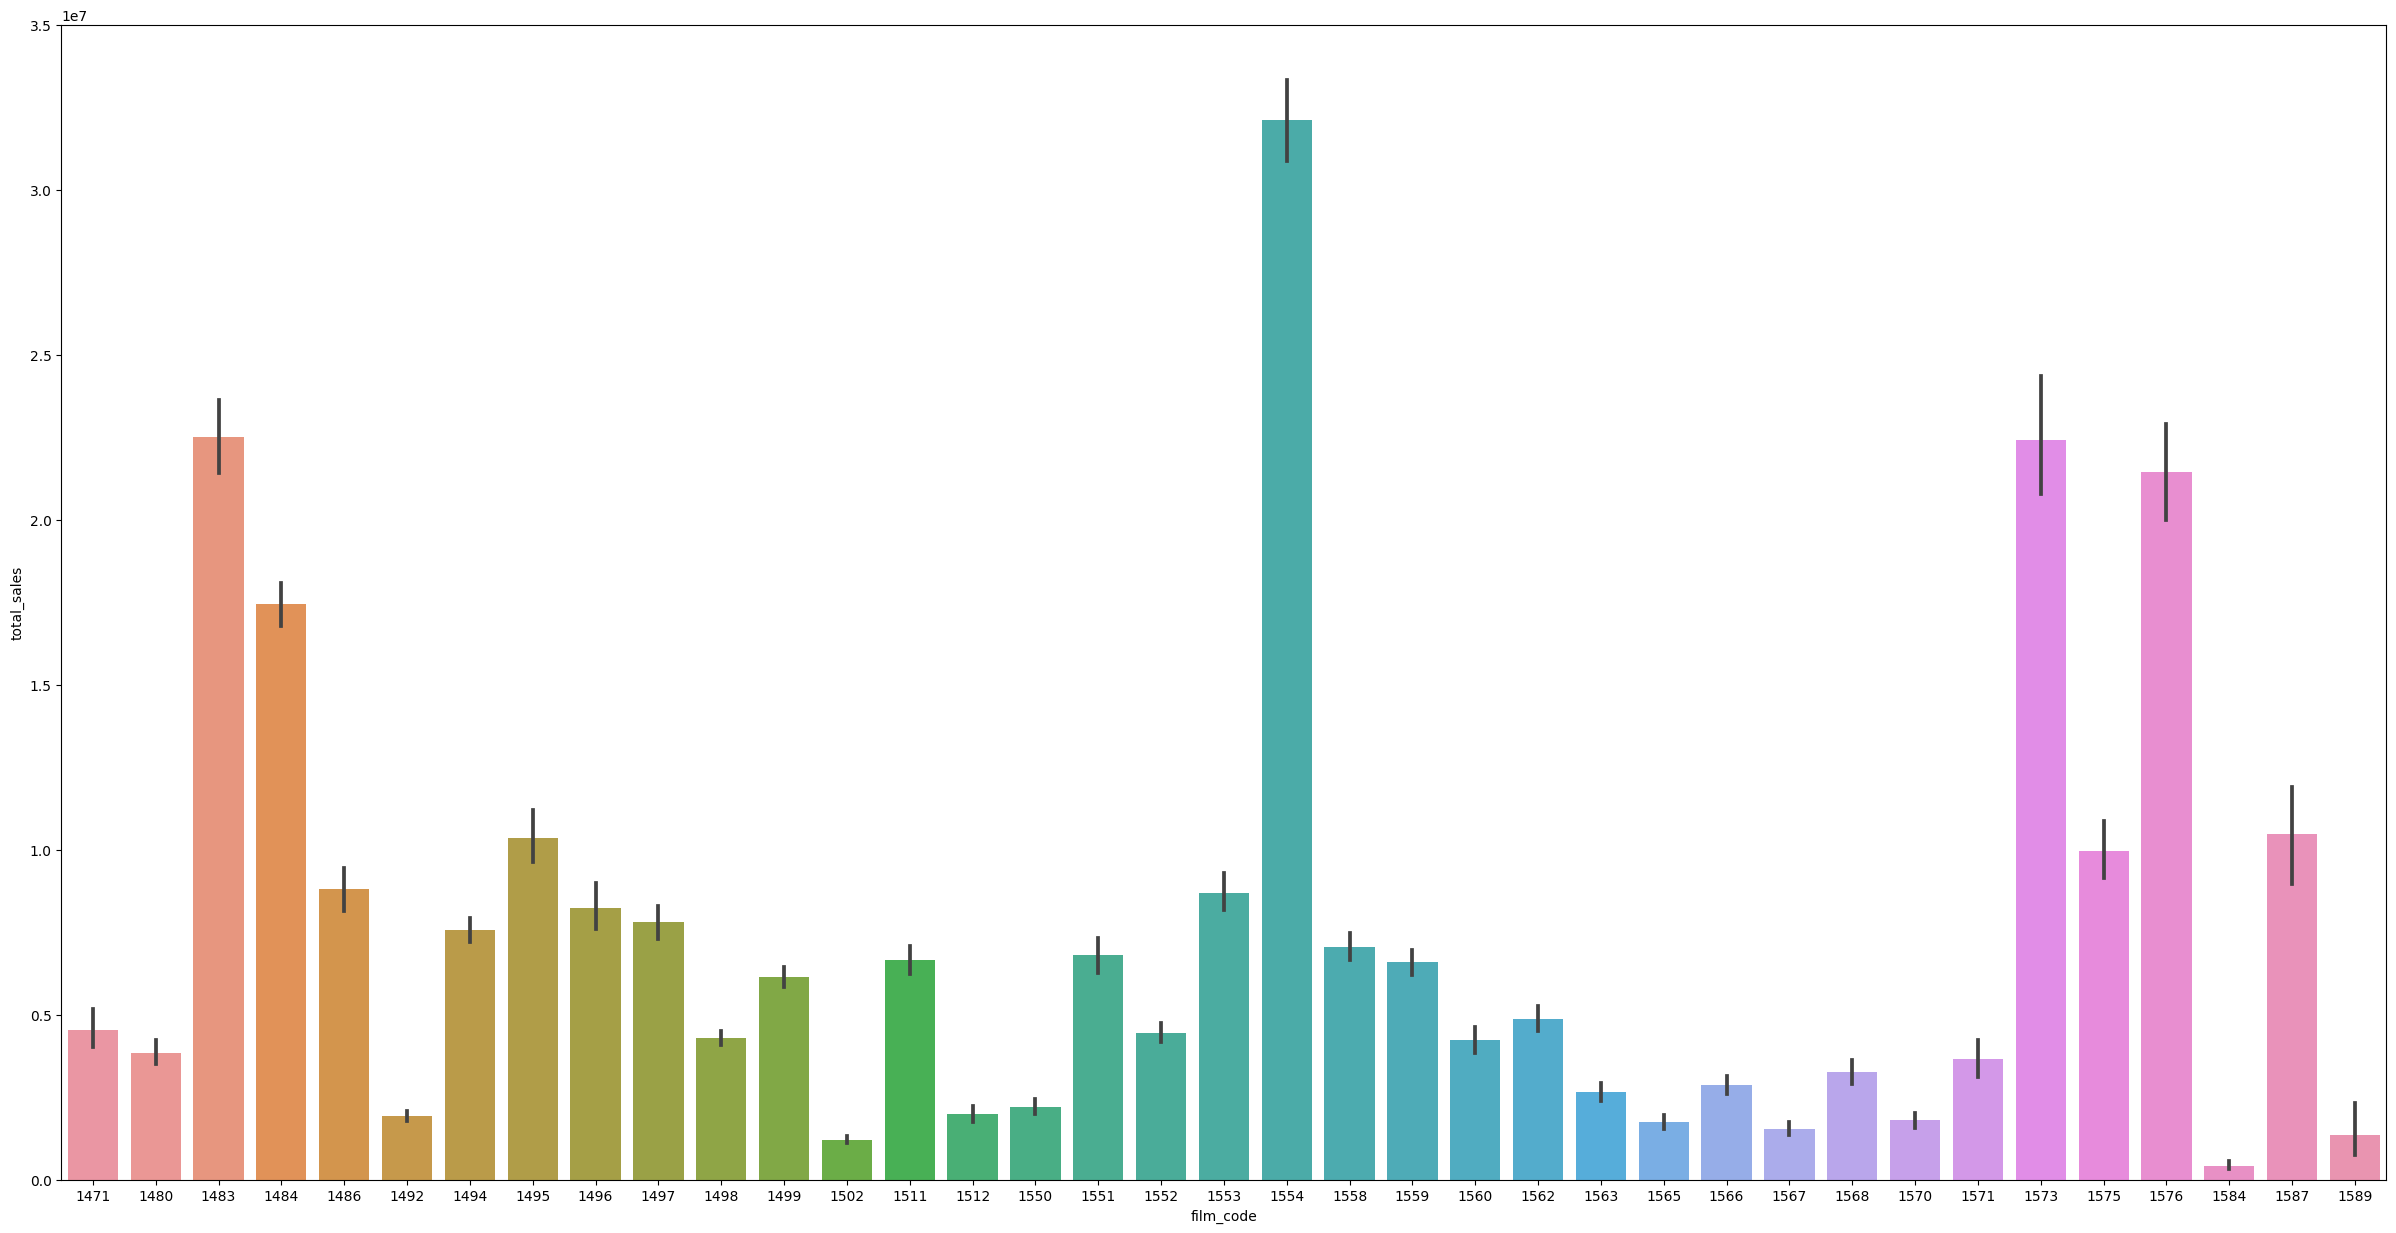

In [21]:
plt.figure(figsize =(30,15))
sns.barplot(x=df['film_code'],y=df['total_sales'])

plt.show()

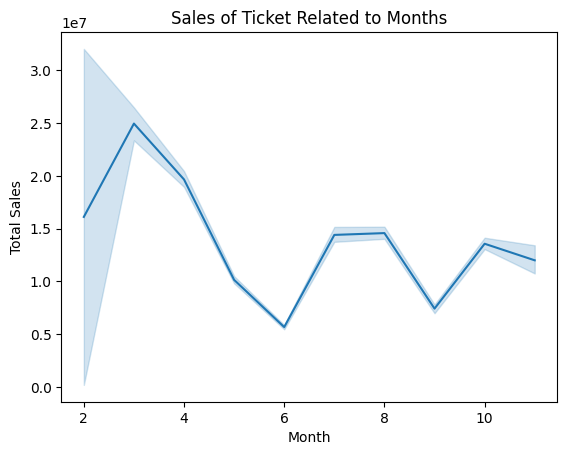

In [17]:
sns.lineplot(x=df['month'],y=df['total_sales'])

plt.title("Sales of Ticket Related to Months")
plt.xlabel("Month")
plt.ylabel("Total Sales")

plt.show()

In [30]:
#to check the relationship between the variables
#scatter plot
fig = px.scatter(df,
                 x='tickets_out',
                 y='tickets_sold',
                 title='tickets_out vs tickets_sold', trendline="ols")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
#to explore the distribution of ticket_price
fig = px.box(df,
             y='ticket_price',
             title='Box Plot of ticket price')
fig.show()

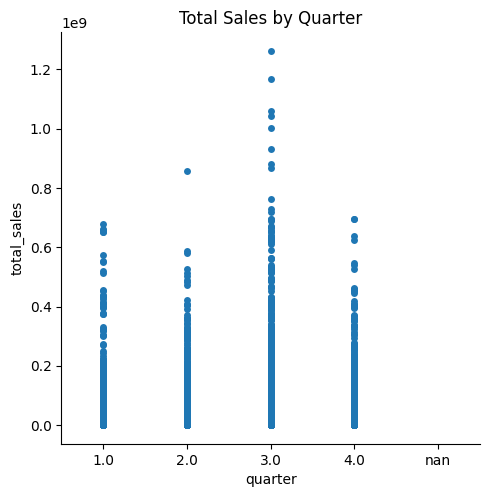

In [34]:
sns.catplot(x="quarter", y="total_sales", data=df, jitter=False)

plt.title("Total Sales by Quarter")
plt.show()

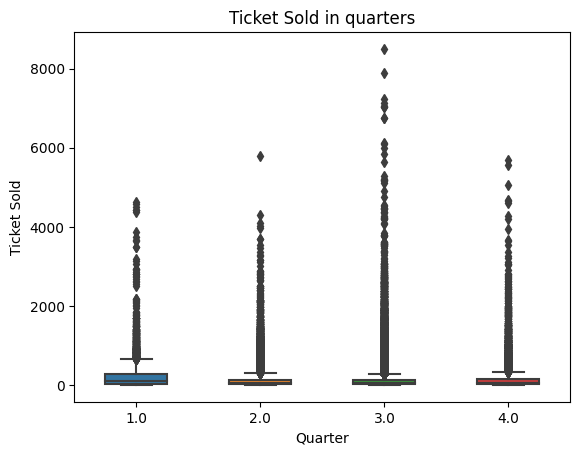

In [37]:
sns.boxplot( x=df["quarter"], y=df["tickets_sold"],width=0.5)

plt.title("Ticket Sold in quarters")
plt.ylabel("Ticket Sold")
plt.xlabel("Quarter")

plt.show()

In [38]:
df['date'] = pd.to_datetime(df.date)
df['month']= df.date.dt.month
df['week']=df['date'].dt.isocalendar().week
df['day']=df.date.dt.day
df['quarter']=df.date.dt.quarter
df['weekDay'] =df.date.dt.weekday

<Axes: xlabel='date'>

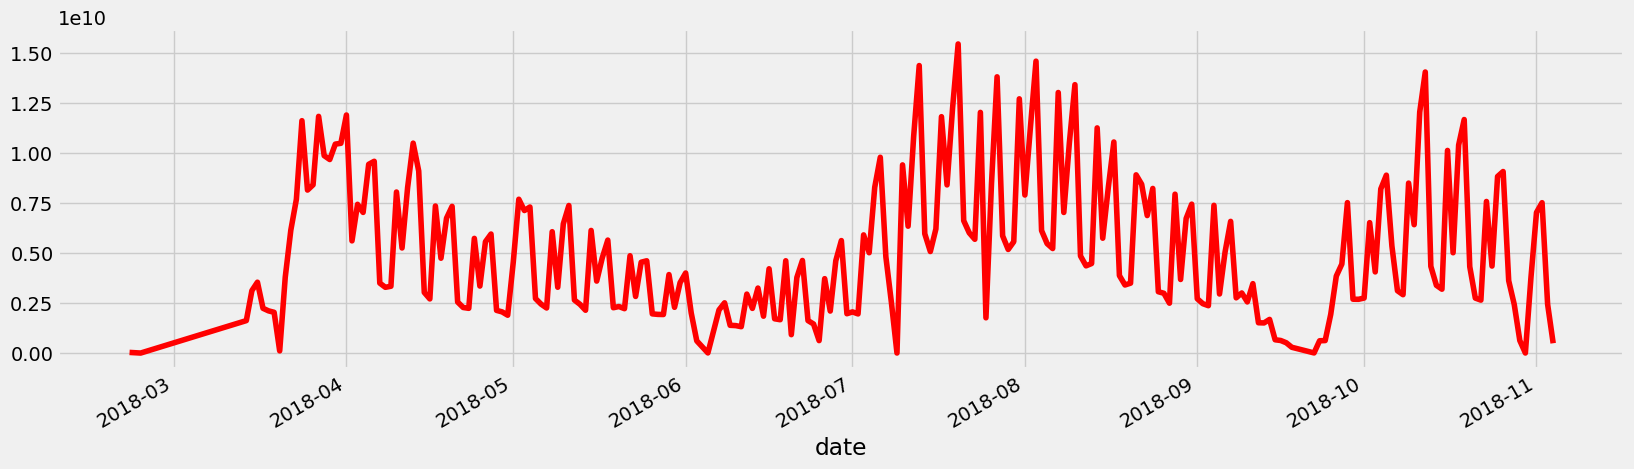

In [39]:
plt.style.use('fivethirtyeight')
df.groupby('date')['total_sales'].sum().plot(figsize=(18, 5), color='red')

<Axes: xlabel='cinema_code'>

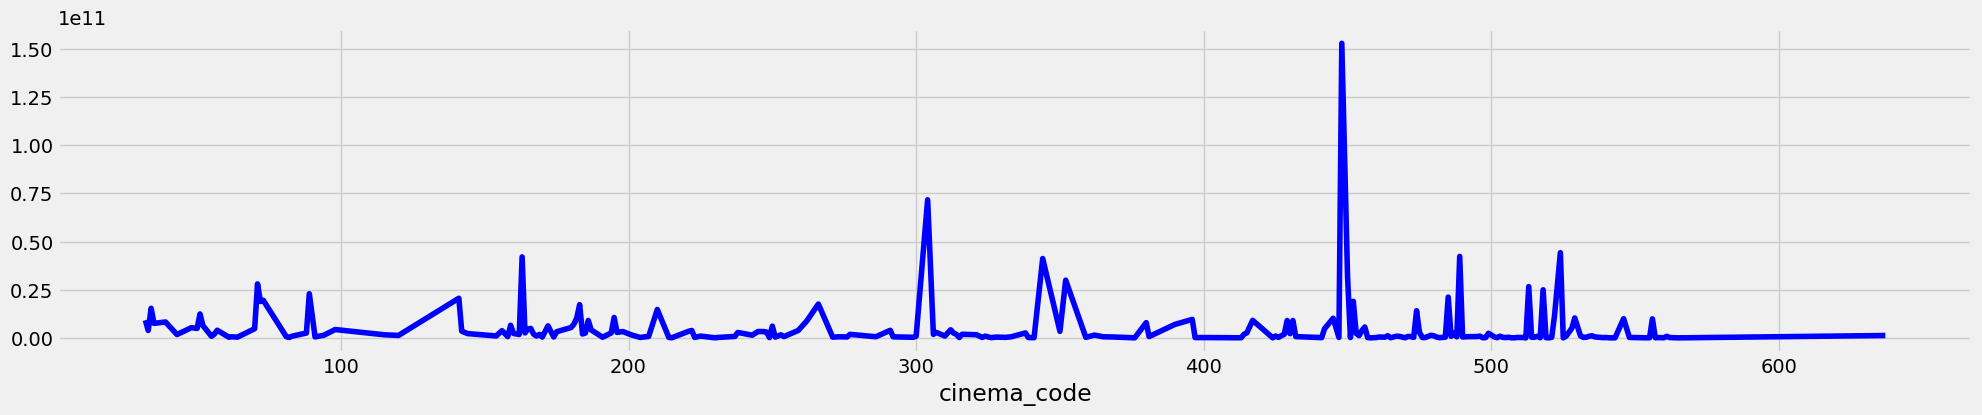

In [40]:
plt.style.use('fivethirtyeight')
df.groupby('cinema_code')['total_sales'].sum().plot(figsize=(22, 4), color='blue')

In [55]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df['film_code'] = label_encoder.fit_transform(df['film_code'])
df['day'] = label_encoder.fit_transform(df['day'])
df['show_time'] = label_encoder.fit_transform(df['show_time'])



In [48]:
# Feature engineering
# You can create additional features like 'day_of_week', 'month', etc.
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['month'] = pd.to_datetime(df['date']).dt.month


In [50]:
# Cluster analysis for customer segmentation
X_cluster = df[['ticket_price', 'tickets_sold']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [56]:
# Recommending movies based on customer preferences
def recommend_movies(customer_cluster):
    recommended_movies = df[df['cluster'] == customer_cluster].sort_values(by='tickets_sold', ascending=False)['cinema_code'].unique()
    return recommended_movies

In [57]:
# Optimizing ticket prices
def optimize_ticket_prices():
    # Use regression to predict ticket sales based on ticket price and other features
    X = df[['ticket_price', 'day', 'show_time']]
    y = df['tickets_sold']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Assuming X_train and X_test
X_train = X_train.drop(['date'], axis=1)
X_test = X_test.drop(['date'], axis=1)

# Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 953710074781.1195


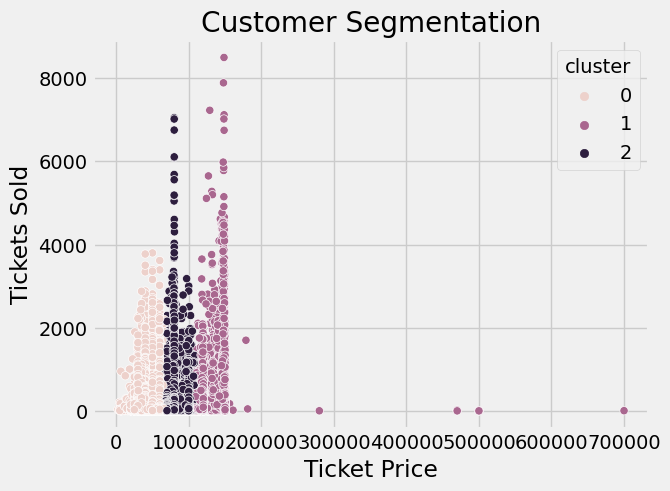

In [71]:
# Visualizing results
sns.scatterplot(x='ticket_price', y='tickets_sold', hue='cluster', data=df)
plt.title('Customer Segmentation')
plt.xlabel('Ticket Price')
plt.ylabel('Tickets Sold')
plt.show()

In [72]:
# Call the functions to get recommendations and optimize ticket prices
recommended_movies = recommend_movies(customer_cluster=0)
print(f"Recommended Movies: {recommended_movies}")

optimize_ticket_prices()

Recommended Movies: [ 51 182  32 186 159 250 195 210  72 183 556 513  34  55  39 194 518  48
 185  70 156 380 181 165 313 262 445 417 175 396  57  52 222 163 166 162
 431 144 243  88 221 338 160 489  94  50 154 164 442 198 253 306 120 529
 180 487 453 561 245 455 415 172 425  43 471 167 207 474 390 307 454 314
  98  35 321 238 174 476 316  56 486 187 430 286 152 259 429 362 291  33
 142 248 328 184 475  83 312 496 350 191 501 499 237 247 491 115 285 368
 414 155 535 528 201 300 456 464 472 273 479 323  89 495 488 531  91  61
 292 468 169 352 521 537 506 428 557 254 426 225 515 481 170 333 223 324
 467 315  81 516 381 480 540 276 470 339 397 463 505 457 359 562 432 168
 365 461 251 504 503 214  62 514 526  82 533 230 473 310 299 196 466 560
 492 534 502 477 536 447  64 511 520 427 509 548 482 484 490 231 460 539
 541 249 451 555 344 204 519 558 522 441 553 532 465 326 271 376 402 413
 517 266 542  71 507 498 450 565 341 508 458 331 497 525 512 215 543 141
 277 304 524]


## Optimization

In [79]:
# Extract relevant columns
data = df[['ticket_price', 'tickets_sold']]

In [80]:
# Define the revenue function to be optimized
def revenue(price):
    return -np.sum(data['ticket_price'] * (price * data['tickets_sold']))

In [81]:
# Set bounds for ticket price
min_price = df['ticket_price'].min()
max_price = df['ticket_price'].max()

In [82]:
# Optimize the revenue function
result = minimize_scalar(revenue, bounds=(min_price, max_price), method='bounded')
optimal_price = result.x
max_revenue = -result.fun

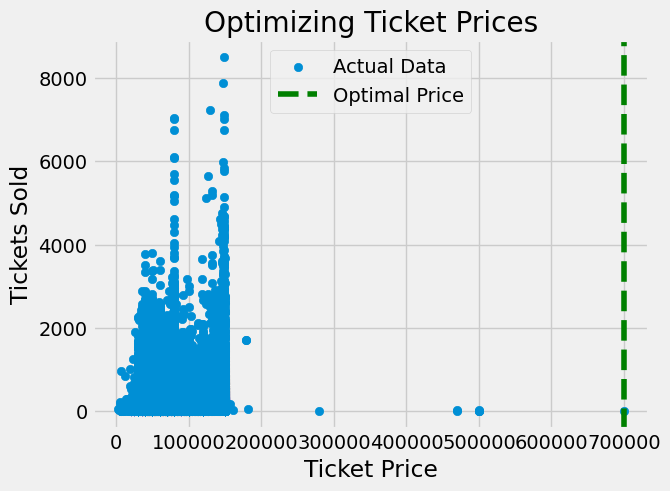

In [83]:
# Plotting the results
plt.scatter(data['ticket_price'], data['tickets_sold'], label='Actual Data')
plt.axvline(x=optimal_price, color='green', linestyle='--', label='Optimal Price')

plt.title('Optimizing Ticket Prices')
plt.xlabel('Ticket Price')
plt.ylabel('Tickets Sold')
plt.legend()
plt.show()

In [84]:
print(f"Optimal Ticket Price: ${optimal_price:.2f}")
print(f"Maximized Revenue: ${max_revenue:.2f}")

Optimal Ticket Price: $699999.99
Maximized Revenue: $837385401863549568.00
